In [1]:
import pandas as pd
import numpy as np

In [2]:
#df1=pd.read_csv(r'C:\Users\User\Desktop\Rupee_Dollar\1947_1983.csv',header=1)
df1=pd.read_csv('https://raw.githubusercontent.com/AllenPeter25/Dollar-equivalent-rupees/master/Web%20Scraping%20using%20RPA/1947_1983.csv',header=1)
df1=df1.rename(columns={'1 USD To INR':'UR'})
df1['YEAR'] = df1.apply(lambda row: row['YEAR']*10000+101,axis=1)
df1.YEAR=df1.YEAR.astype(int)
#df1.dtypes
df1.head()

,YEAR,UR
0,19470101,4.16
1,19480101,3.31
2,19490101,3.67
3,19500101,4.76
4,19510101,4.76


In [3]:
#df2=pd.read_csv(r'C:\Users\User\Desktop\Rupee_Dollar\1984_2019.csv',header=1)#,parse_dates=['YEAR'])
df2=pd.read_csv('https://raw.githubusercontent.com/AllenPeter25/Dollar-equivalent-rupees/master/Web%20Scraping%20using%20RPA/1984_2019.csv',header=1)
df2=df2.rename(columns={'1 USD T0 INR':'UR'})
df2=df2.drop(36)
df2.YEAR=pd.to_numeric(df2['YEAR'])
df2['YEAR'] = df2.apply(lambda row: row['YEAR']*10000+101,axis=1)
df2=df2.drop(df2.index[26:])
df2.head()

,YEAR,UR
0,19840101,11.36
1,19850101,12.37
2,19860101,12.61
3,19870101,12.96
4,19880101,13.92


In [4]:
#df3=pd.read_csv(r'C:\Users\User\Desktop\Rupee_Dollar\2010_2020.csv',header=1,parse_dates=['US Dollar'])
df3=pd.read_csv('https://raw.githubusercontent.com/AllenPeter25/Dollar-equivalent-rupees/master/Web%20Scraping%20using%20RPA/2010_2020.csv',header=1,parse_dates=['US Dollar'])
df3.Analysis=df3.Analysis.str.replace(' INR','').astype(float)
df3['US Dollar']=df3['US Dollar'].astype(str)
df3['US Dollar']=df3['US Dollar'].str.replace('-','').astype(int)
df3=df3.rename(columns={'US Dollar':'YEAR','Analysis':'UR'})
df3

,YEAR,UR
0,20200627,75.6249
1,20200626,75.6249
2,20200625,75.5276
3,20200624,75.7670
4,20200623,75.6579
...,...,...
3913,20091010,46.4921
3914,20090910,46.4869
3915,20090810,46.3530
3916,20090710,46.6848


In [5]:
df=pd.concat([df1,df2])
df=pd.concat([df,df3])
df=df.sort_values('YEAR')
df

,YEAR,UR
0,19470101,4.16
1,19480101,3.31
2,19490101,3.67
3,19500101,4.76
4,19510101,4.76
...,...,...
136,20201202,71.3032
107,20201203,74.4382
76,20201204,76.1628
46,20201205,75.3341


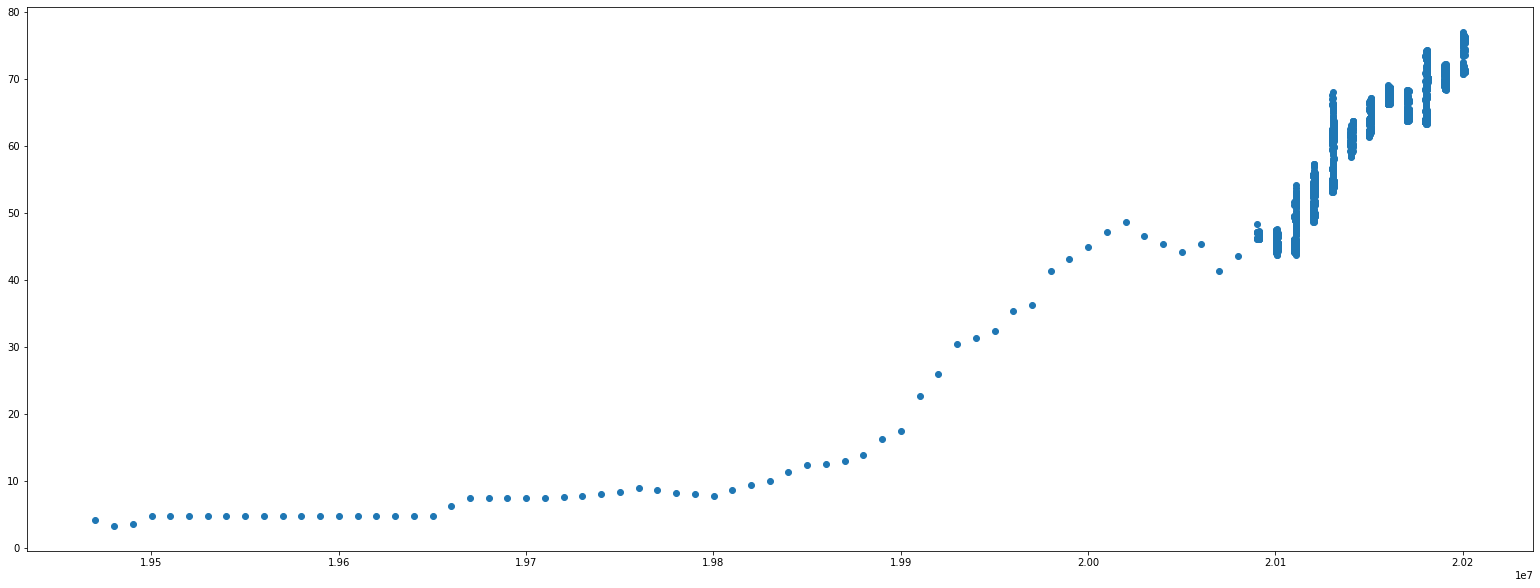

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(27,10))
plt.scatter(df['YEAR'],df['UR'])

In [7]:
from sklearn import linear_model

reg=linear_model.LinearRegression()
reg.fit(df[['YEAR']],df['UR'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
reg.predict([[19961207]])

array([32.066802])

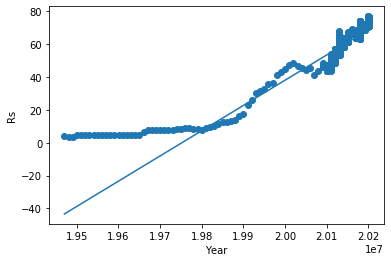

In [9]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Rs')
plt.scatter(df.YEAR,df.UR)
plt.plot(df.YEAR,reg.predict(df[['YEAR']]))

In [10]:
accuracy = reg.score(df[['YEAR']],df['UR'])
print('Accuracy='+str(accuracy*100)+'%')

Accuracy=73.64454449742507%


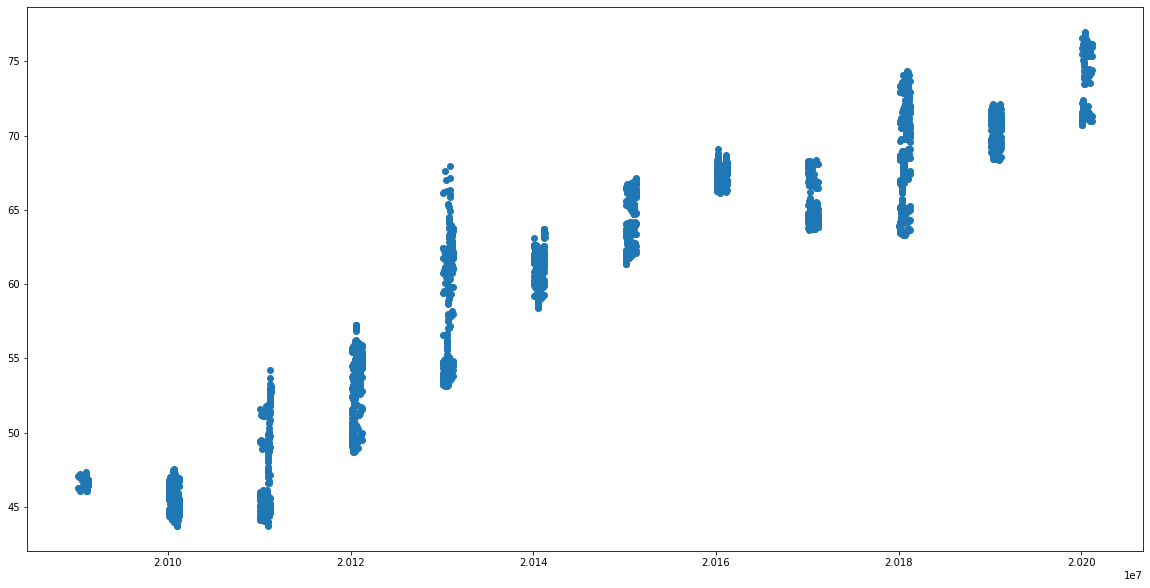

In [11]:
#since the accuracy is just 73.6% we will ignore the values from 1947 to 2008 year by year average.
#consider only df3 which is day by day value from 2009 (df3)
plt.figure(figsize=(20,10))
plt.scatter(df3['YEAR'],df3['UR'])

In [12]:
from sklearn import linear_model
r=linear_model.LinearRegression()
r.fit(df3[['YEAR']],df3['UR'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
r.predict([[20200704]])

array([75.1731456])

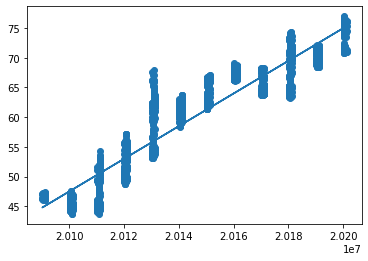

In [14]:
%matplotlib inline
plt.scatter(df3.YEAR,df3.UR)
plt.plot(df3[['YEAR']],r.predict(df3[['YEAR']]))

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df3['YEAR'],df3['UR'],test_size=0.25,random_state=10)

In [159]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [160]:
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

In [161]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
s=clf.predict(X_test)

In [163]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(s,y_test.UR)))

3.122348398449834


In [164]:
#input as: yyyymmdd
clf.predict([[20210423]])

array([[77.85541781]])

3.044826532452173


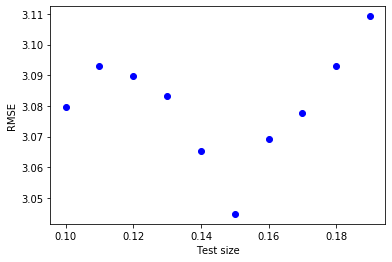

In [165]:
size=np.arange(0.1,0.2,0.01)
ideal=10
for i in size:
    X_train, X_test, y_train, y_test=train_test_split(df3['YEAR'],df3['UR'],test_size=i,random_state=10)
    X_train=pd.DataFrame(X_train)
    y_train=pd.DataFrame(y_train)
    X_test=pd.DataFrame(X_test)
    y_test=pd.DataFrame(y_test)
    from sklearn.linear_model import LinearRegression
    clf=LinearRegression()
    clf.fit(X_train,y_train)
    s=clf.predict(X_test)
    a=np.sqrt(mean_squared_error(s,y_test))
    if a<ideal:ideal=a
    plt.plot(i,a,'bo')
    plt.ylabel('RMSE')
    plt.xlabel('Test size')
print(ideal)

In [167]:
clf.predict([[20210325]])-(clf.predict([[20210101]])-clf.predict([[20201231]]))

array([[75.3927941]])

In [168]:
(clf.predict([[20210101]])-clf.predict([[20201231]]))

array([[2.4321841]])

In [171]:
import pickle
pickle.dump(clf,open('dermodel.pkl','wb'))